### Algerian Forest Fires Dataset
- Data sets inlcludes 244 instnces that regroup a data of two region of algeria, namely the bejaia region located in the northease of algeria and sidi bel-abbes region located in the northwest of algeria.
- 122 instances of each region.
- 344 instances have been classifies into fire(138) and not fire(106) classes



## Attributes for each region
- Data(DD/MM/YYYY)Day, month('june' to 'september'), yeae (2012) weather data observations.
- Temp : temprature noon(temprature max) in celsius degrees 33 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws : Wind speed in km/h : 6 to 29
- Rain : total day in mm : 0 to 16.8 FWI components.
- Fine Fule moisture code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought code(DC) index from the FWI system : 7 to 220.4
- initial spread index(ISI) index from the FWI system: 0 to 18.5
- Buildup index(BUI) index from the FWI system:1.1 to 86
- Fire weather index (FWI) index: 0 to 31.1
- Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## The dataset is converted into two sets based on region from 122 th index, we can make a new column based on the region
- "Bejaia region dataset"
- 'Sidi-bel abbes region dataset'


In [6]:
df.loc[0:122,'Region']=0
df.loc[122:, 'Region']=1 

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [9]:
df['Region']=df[['Region']].astype(int)

In [10]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

In [11]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [12]:
# removing the null value and resting the index value
df=df.dropna().reset_index(drop=True)

In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
## Here we see string value in the row insist of integer value.
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
df=df.drop(122).reset_index(drop=True)

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
# Fixing space in the colums
df.columns=df.columns.str.strip()

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
## Changing the required columns into integer types
df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [21]:
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
 RH             int64
 Ws             int64
dtype: object

In [22]:
objects=[i for i in  df.columns if df[i].dtypes=='O']

In [23]:
objects

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [24]:
for i in objects:
    if i !='Classes':
        df[i]=df[i].astype(float)

In [25]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
 RH              int64
 Ws              int64
dtype: object

In [26]:
# lets save the clean dataset into file
df.to_csv('Algeria_clean_dataset.csv',index=False)

## Exploratory Data_analysis

In [27]:
# delecting data, month and year
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,57,18
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,61,13
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,82,22
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,89,13
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,77,16


In [28]:
df_copy=df.drop(['day','month','year'],axis=1)

In [29]:
df_copy.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,57,18
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,61,13


In [30]:
df_copy['Classes']=df['Classes'].str.strip()

In [31]:
df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [32]:
## Encoding the categorical features
df_copy['Classes']=np.where(df_copy['Classes']=='not fire', 0,1)

In [33]:
df_copy['Classes'].head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

In [34]:
df_copy['Classes'].tail()

238    1
239    0
240    0
241    0
242    0
Name: Classes, dtype: int64

/tmp/ipykernel_92/2436411002.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


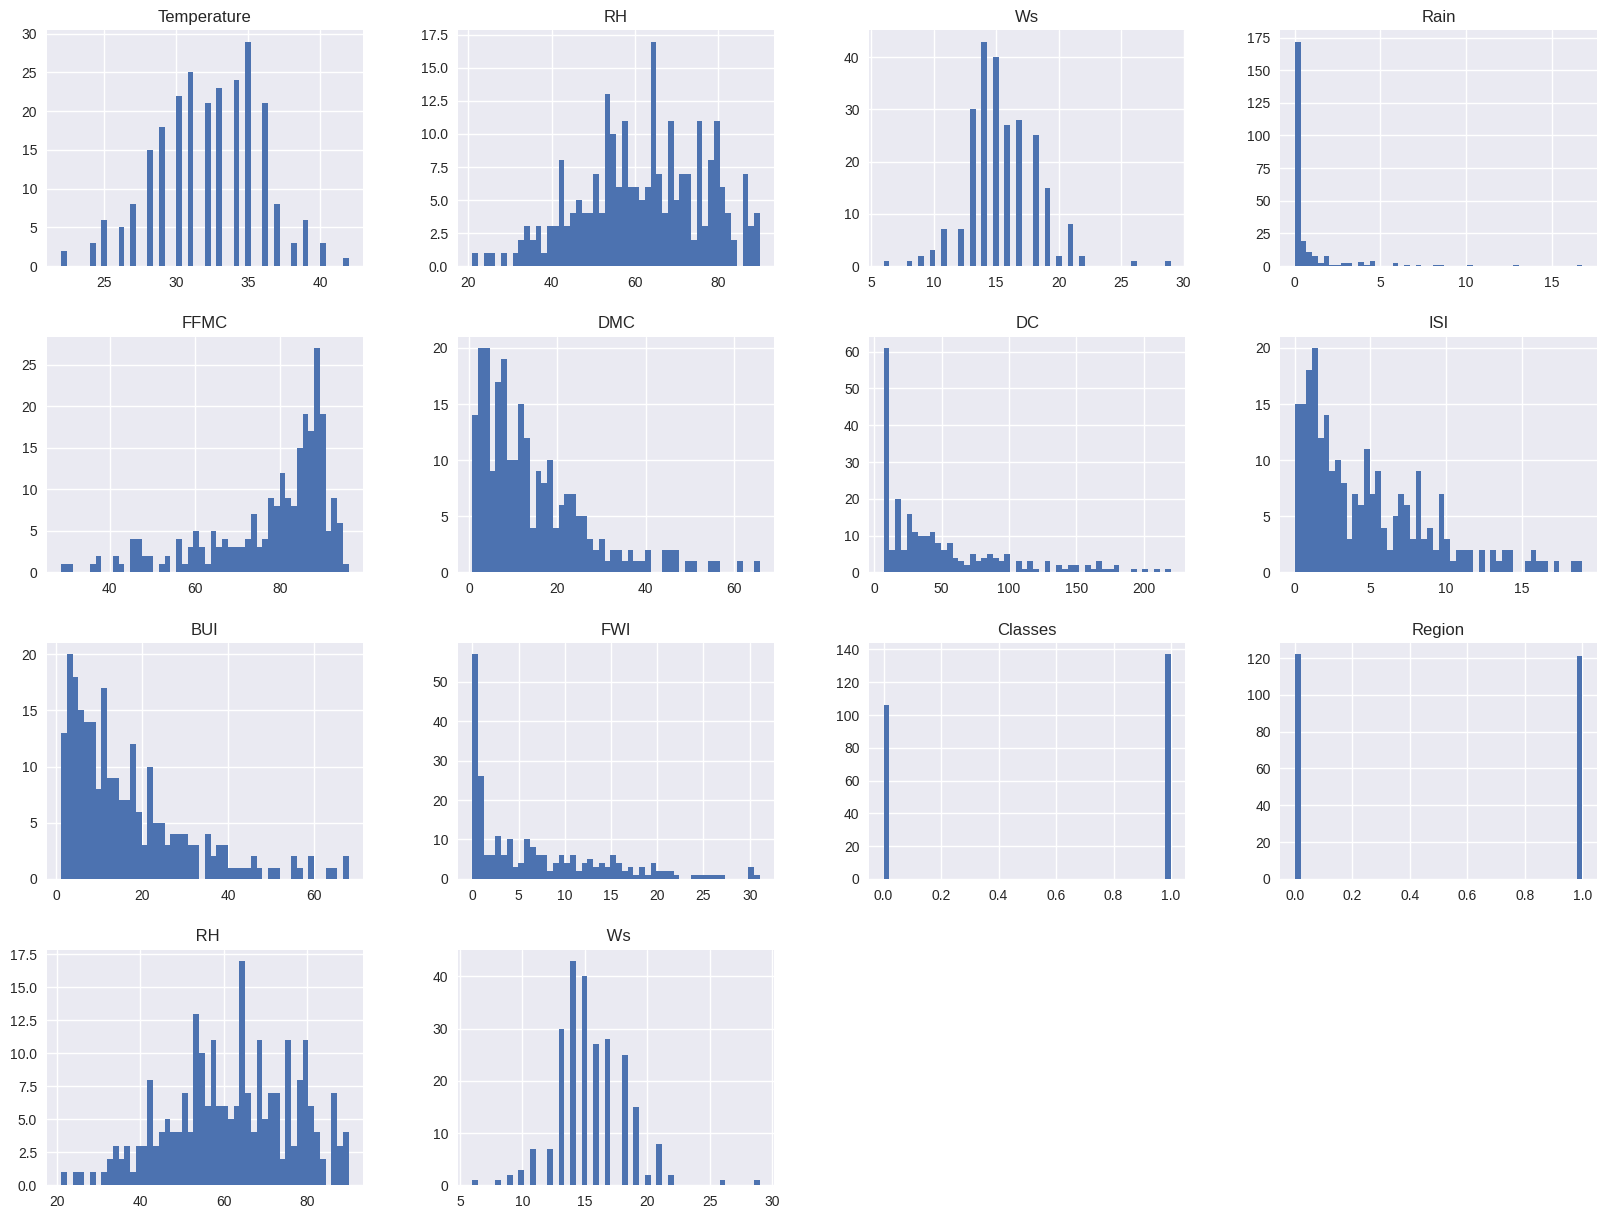

In [35]:
plt.style.use('seaborn')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
## Percentage for pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

In [37]:
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

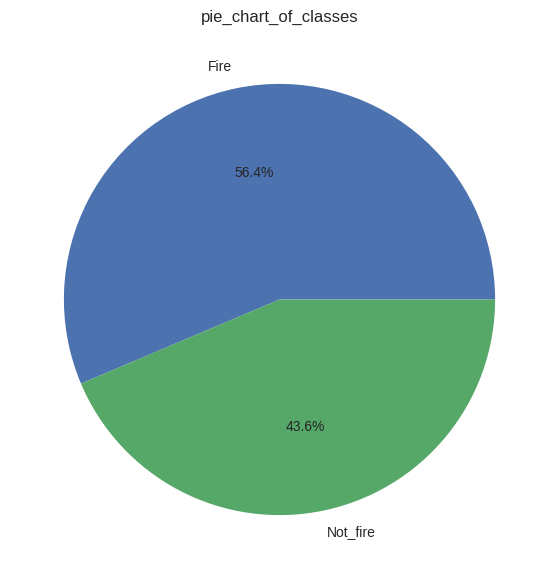

In [38]:
# ploting piechat
classlabes=['Fire','Not_fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabes, autopct='%1.1f%%')
plt.title('pie_chart_of_classes')
plt.show()

## Correlation

In [39]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555,-0.651400,-0.284510
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682,1.000000,0.244048
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160,0.244048,1.000000
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013,0.222356,0.171506
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241,-0.644873,-0.166548
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089,-0.408519,-0.000721
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734,-0.226941,0.079135
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197,-0.686667,0.008532
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408,-0.353841,0.031438
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102,-0.580957,0.032368


/tmp/ipykernel_92/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

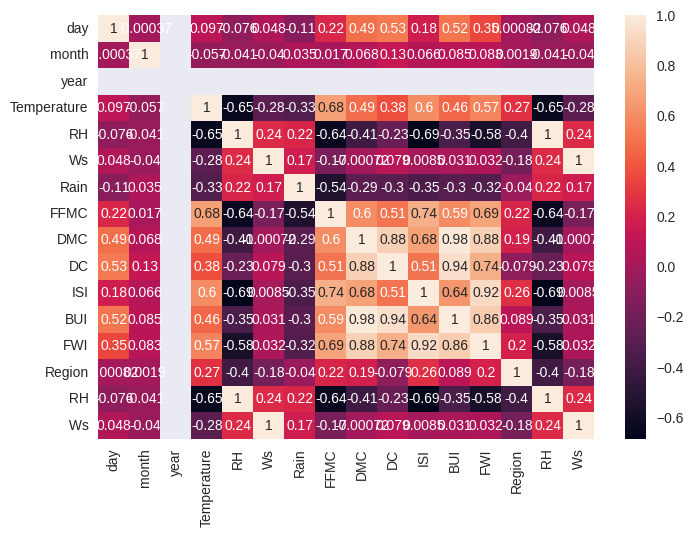

In [40]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

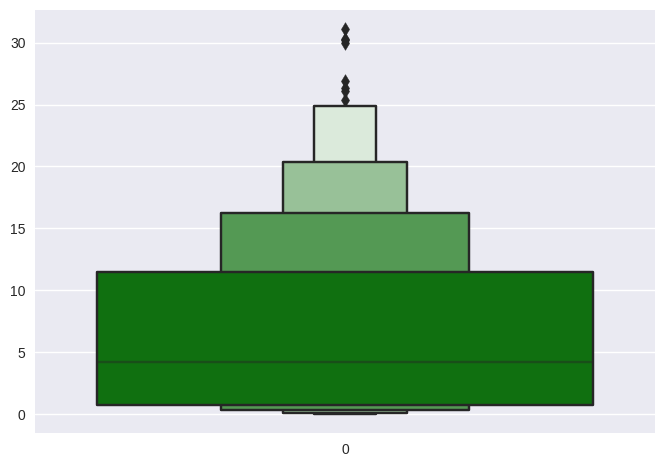

In [41]:
## Box_plot
sns.boxenplot(df['FWI'],color='green')

In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,57,18
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,61,13
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,82,22
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,89,13
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,77,16


In [43]:
df['Classes']=df['Classes'].str.strip()

In [44]:
df['Classes']=np.where(df['Classes']=='not fire',0,1)

Text(0.5, 1.0, 'Fire analysis of sidi-Bel region')

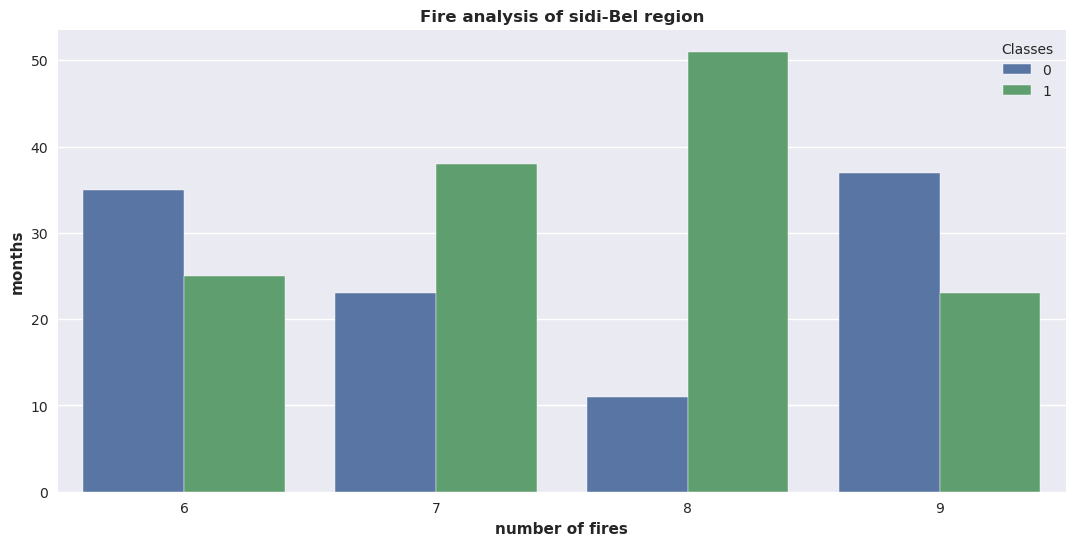

In [45]:
## monthly fire analysis.
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('number of fires',weight='bold')
plt.ylabel('months',weight='bold')
plt.title('Fire analysis of sidi-Bel region',weight='bold')


Text(0.5, 1.0, 'Fire analysis of sidi-Bel region')

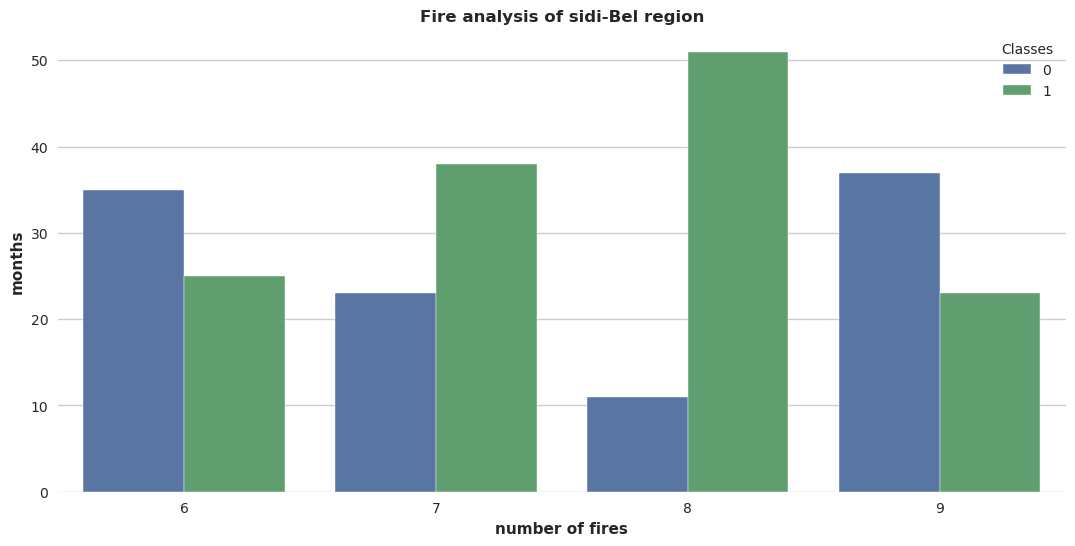

In [46]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('number of fires',weight='bold')
plt.ylabel('months',weight='bold')
plt.title('Fire analysis of sidi-Bel region',weight='bold')


In [60]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555,-0.651400,-0.284510
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682,1.000000,0.244048
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160,0.244048,1.000000
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013,0.222356,0.171506
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241,-0.644873,-0.166548
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089,-0.408519,-0.000721
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734,-0.226941,0.079135
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197,-0.686667,0.008532
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408,-0.353841,0.031438
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102,-0.580957,0.032368


In [48]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.append(col_name)
            return col_corr

In [53]:
correlation(df,0.60)

set()